In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
import pandas as pd

In [3]:
loaddata_train1=np.loadtxt('/home/mahima/IANNECJ_MAHIMA/synthetic/synthetic_data/nonlinearlySeparable/group4/class1_train.txt')
loaddata_train2=np.loadtxt('/home/mahima/IANNECJ_MAHIMA/synthetic/synthetic_data/nonlinearlySeparable/group4/class2_train.txt')
loaddata_test1=np.loadtxt('/home/mahima/IANNECJ_MAHIMA/synthetic/synthetic_data/nonlinearlySeparable/group4/class1_test.txt')
loaddata_test2=np.loadtxt('/home/mahima/IANNECJ_MAHIMA/synthetic/synthetic_data/nonlinearlySeparable/group4/class2_test.txt')
loaddata_train=np.concatenate((loaddata_train1, loaddata_train2), axis=0)
loaddata_test=np.concatenate((loaddata_test1, loaddata_test2), axis=0)

In [4]:
label1=np.ones((loaddata_train1.shape[0], 1))
label2=np.ones((loaddata_train2.shape[0], 1)) * -1
r1=np.append(label1, loaddata_train1, axis=1)
r2=np.append(label2, loaddata_train2, axis=1)
train_data=np.concatenate((r1,r2))
len(train_data)
#labels=np.concatenate(label1, label2)

2447

In [5]:
label3=np.ones((loaddata_test1.shape[0], 1))
label4=np.ones((loaddata_test2.shape[0], 1)) * -1
r3=np.append(label3, loaddata_test1, axis=1)
r4=np.append(label4, loaddata_test2, axis=1)
test_data=np.concatenate((r3,r4))

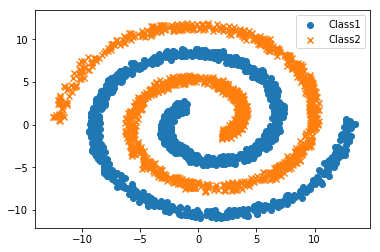

In [6]:
plt.scatter(loaddata_train1[:,0], loaddata_train1[:,1], marker='o', label='Class1')
plt.scatter(loaddata_train2[:,0], loaddata_train2[:,1], marker='x', label='Class2')
plt.legend()
plt.show()

In [7]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((float(instance1[x]) - float(instance2[x])), 2)
    return math.sqrt(distance)

#euclideanDistance([4,3], [2,3], 2)

In [8]:
def getKNeighbors(train_data, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(train_data)):
        dist = euclideanDistance(testInstance, train_data[x], length)
        distances.append((train_data[x], dist))
    distances.sort(key=operator.itemgetter(1))
#     print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [9]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][0]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print(response)
    return sortedVotes[0][0]


In [10]:
def main():
    l00 = 0
    l01 = 0
    l10 = 0
    l11 = 0
    #split = 0.70
    print ('Train: ' + repr(len(train_data)))
    print ('Test: ' + repr(len(test_data)))
    #generate predictions
    #predictions = []
    k = input("Enter value of k: ")
    k = int(k) 
    list_pred = []
    list_act = []
    for x in range(len(test_data)):
        neighbors = getKNeighbors(train_data, test_data[x], k)
        result = getResponse(neighbors)
        #predictions.append(result)
        list_pred.append(result)
        list_act.append(test_data[x][0])
    for i in range(0, len(test_data)):
        x = list_pred[0]
        y = list_act[0]
        if int(list_pred[i]) == -1 and int(list_act[i]) == -1:
            l00 += 1
        elif int(list_pred[i]) == -1 and int(list_act[i]) == 1:
            l01 += 1
        elif int(list_pred[i]) == 1 and int(list_act[i]) == -1:
            l10 += 1
        elif int(list_pred[i]) == 1 and int(list_act[i]) == 1:
            l11 += 1
        i+=1

    a = np.array([[l00, l01],
        [l10, l11]])
    print('Confusion Matrix: ')	
    print(pd.DataFrame(a, columns = ['class_0', 'class_1'], index = ['class_0', 'class_1']))

    acc = (l00+l11)*100/(l00+l01+l10+l11)
    print('Accuracy: ' + repr(acc))
main()

Train: 2447
Test: 977
Enter value of k: 7
Confusion Matrix: 
         class_0  class_1
class_0      488        0
class_1        0      489
Accuracy: 100.0
